# Poisson distribution

$P(Z=k) = \frac{\lambda^k e^{-\lambda}}{k!}$

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import scipy.stats as stats
import numpy as np
from matplotlib import pyplot as plt
import pymc as pm
figsize(12.5, 4)
colors = ['#348ABD', '#A60628']

In [3]:
a = np.arange(16)
poi = stats.poisson
l = [1.5, 4.2]

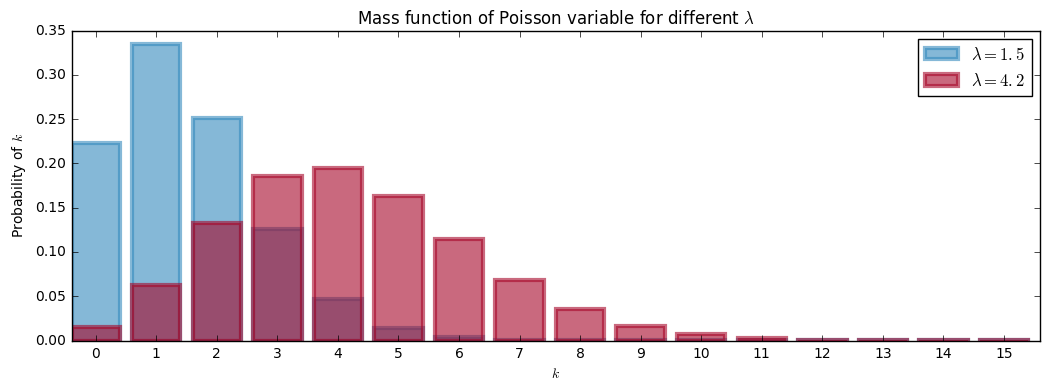

In [13]:
plt.bar(a, poi.pmf(a, l[0]), color=colors[0], label='$\lambda=%.1f$' % l[0], alpha=.6, edgecolor=colors[0], lw="3")
plt.bar(a, poi.pmf(a, l[1]), color=colors[1], label='$\lambda=%.1f$' % l[1], alpha=.6, edgecolor=colors[1], lw="3")
plt.xticks(a + .4, a)
plt.legend()
plt.ylabel("Probability of $k$")
plt.xlabel("$k$")
_ = plt.title("Mass function of Poisson variable for different $\lambda$")

# Exponential distribution

$f_Z(z|\lambda) = \lambda e^{-\lambda z}$

In [28]:
a = np.linspace(0, 4, 100)
exp = stats.expon
lambdas = [0.5, 1]

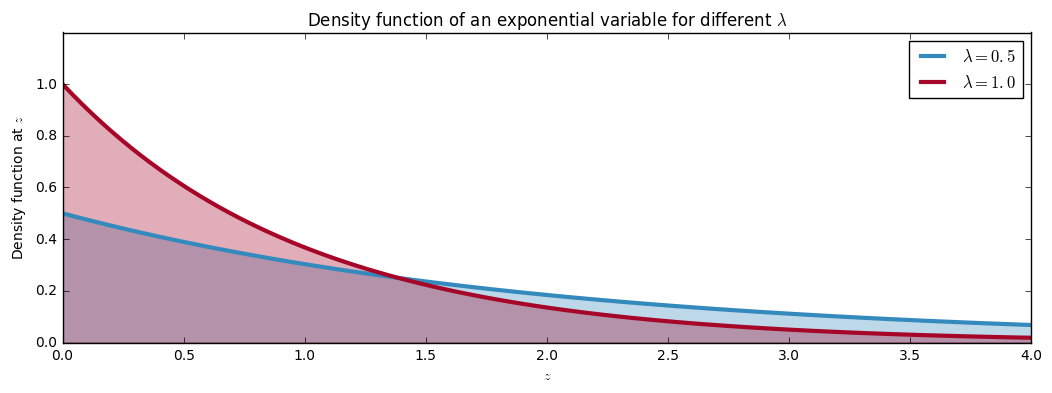

In [30]:
for l, c in zip(lambdas, colors):
    plt.plot(a, exp.pdf(a, scale = 1. / l), color=c, label='$\lambda=%.1f$' % l, lw=3)
    plt.fill_between(a, exp.pdf(a, scale = 1. / l), color=c, alpha=.33)
plt.legend()
plt.ylabel("Density function at $z$")
plt.xlabel("$z$")
plt.ylim(0, 1.2)
_ = plt.title("Density function of an exponential variable for different $\lambda$")

# Binomial Distribution

$P(X=k) = \binom{N}{k} p^k (1 - p)^{N - k}$

In [6]:
bin = stats.binom
probas = [.4, .9]
N = 10
a = np.arange(N + 1)

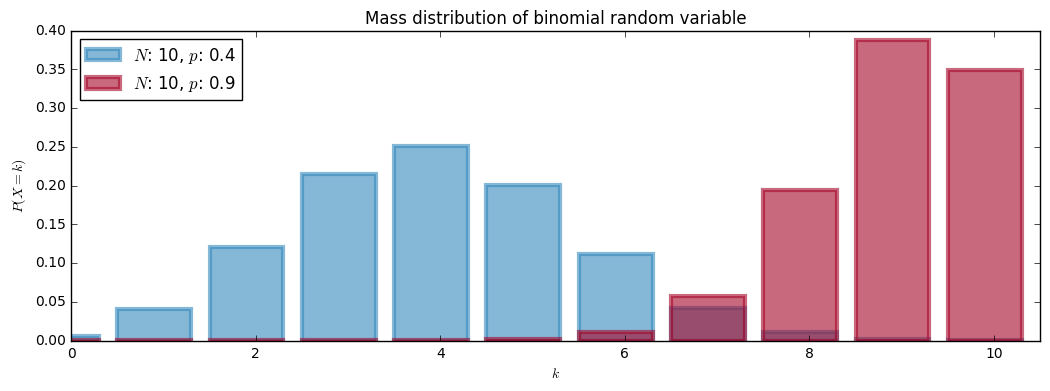

In [14]:
for i, p in enumerate(probas):
    plt.bar(a - .5, bin.pmf(a, N, p), 
            color=colors[i],
            edgecolor=colors[i],
            alpha=.6,
            label="$N$: %d, $p$: %.1f" % (N, p),
            lw=3
           )
plt.legend(loc='upper left')
plt.xlim(0, 10.5)
plt.xlabel('$k$')
plt.ylabel('$P(X = k)$')
_ = plt.title("Mass distribution of binomial random variable")

# Normal distribution

$\mathcal{N}$

# Text Messages

19.743243243243242

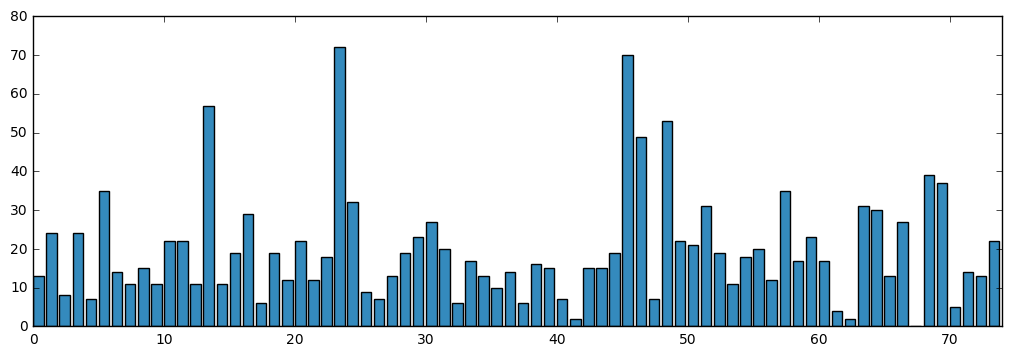

In [38]:
txtdata = np.loadtxt('data/txtdata.csv')
n = len(txtdata)
m = txtdata.mean()
plt.bar(np.arange(n), txtdata, color=colors[0])
plt.xlim(0, n)

In [83]:
alpha = 1 / m
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)
tau = pm.DiscreteUniform("tau", lower=0, upper=n)

print("Random output", tau.random(), tau.random(), tau.random())

@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out=np.zeros(n)
    out[:tau] = lambda_1
    out[tau:] = lambda_2
    return out

obs = pm.Poisson("obs", lambda_, value=txtdata, observed=True)

Random output 14 1 39


In [84]:
model = pm.Model([obs, lambda_1, lambda_2, tau])
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

 [-----------------100%-----------------] 40000 of 40000 complete in 8.5 sec

In [81]:
mcmc.sample(50000)

 [-----------------100%-----------------] 50000 of 50000 complete in 11.1 sec

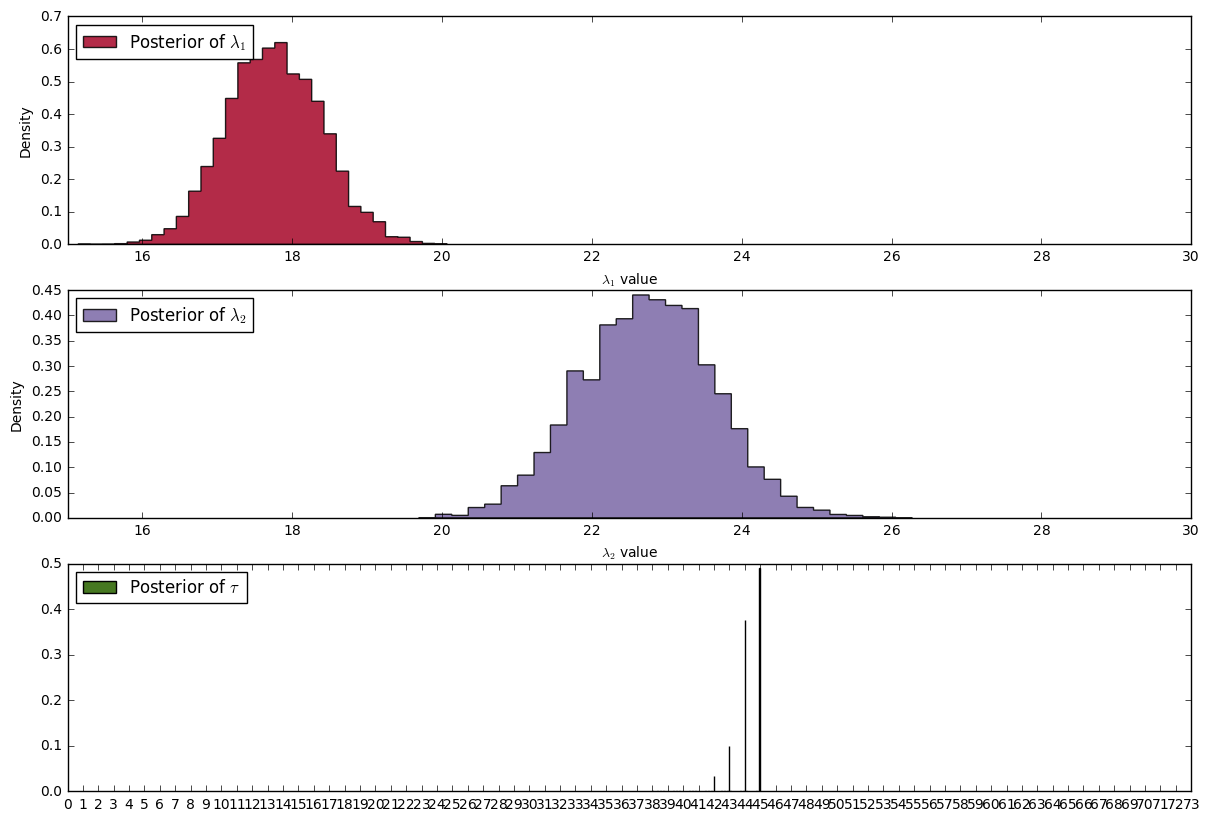

In [88]:
l1s = mcmc.trace('lambda_1')[:]
l2s = mcmc.trace('lambda_2')[:]
ts = mcmc.trace('tau')[:]

figsize(14.5, 10)

ax = plt.subplot(311)
#ax.set_autoscaley_on(False)
plt.hist(l1s, histtype='stepfilled', bins=30, alpha=.85, label='Posterior of $\lambda_1$', color='#A60628', normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel('$\lambda_1$ value')
plt.ylabel('Density')

ax = plt.subplot(312)
#ax.set_autoscaley_on(False)
plt.hist(l2s, histtype='stepfilled', bins=30, alpha=.85, label='Posterior of $\lambda_2$', color='#7A68A6', normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel('$\lambda_2$ value')
plt.ylabel('Density')

ax = plt.subplot(313)
w = 1 / ts.shape[0] * np.ones_like(ts)
plt.hist(ts, bins=n, color='#467821', weights=w, alpha=1, label=r'Posterior of $\tau$', rwidth=.2)
plt.xticks(np.arange(n))
plt.legend(loc="upper left")

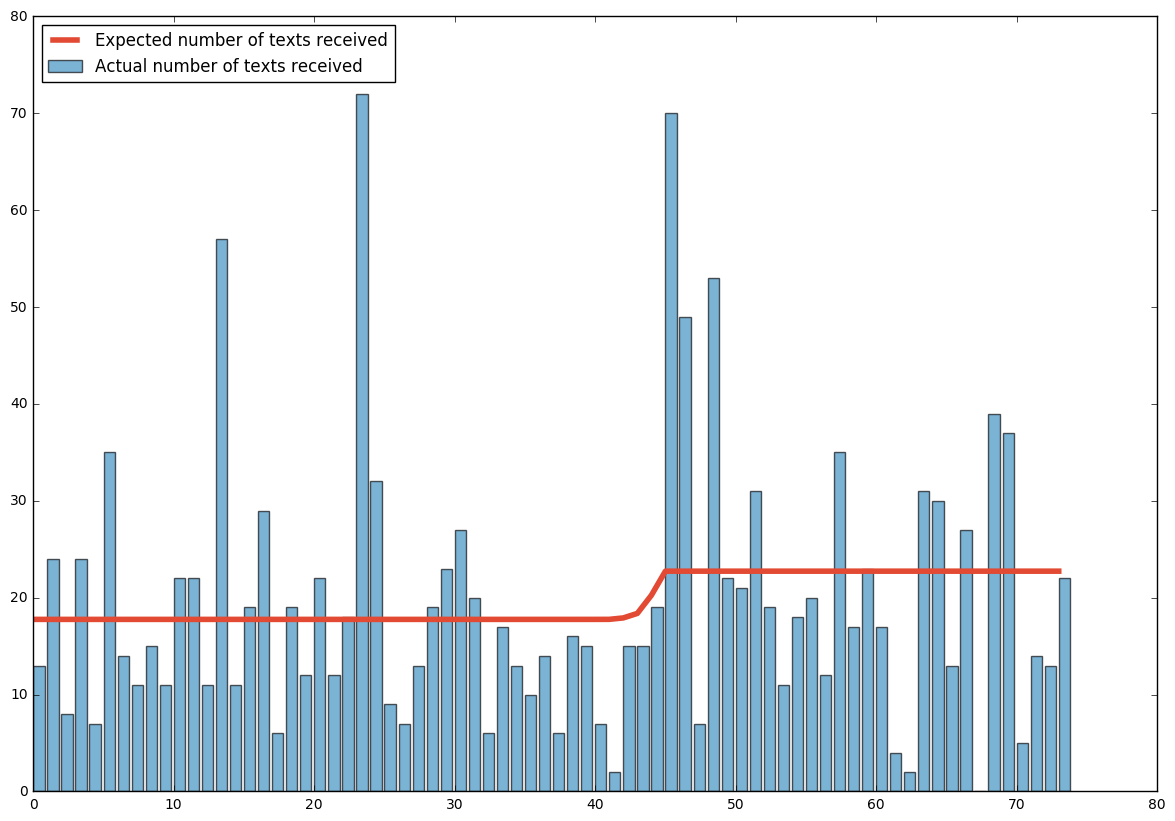

In [94]:
expected = np.zeros(n)
n_sample = ts.shape[0]
for day in range(0, n):
    ix = day < ts
    expected[day] = (l1s[ix].sum() + l2s[~ix].sum()) / n_sample
plt.plot(range(n), expected, lw=4, color='#E24A33', label='Expected number of texts received')
plt.bar(np.arange(n), txtdata, color='#348ABD', alpha=.65, label='Actual number of texts received')
plt.legend(loc='upper left')

# Challenger data

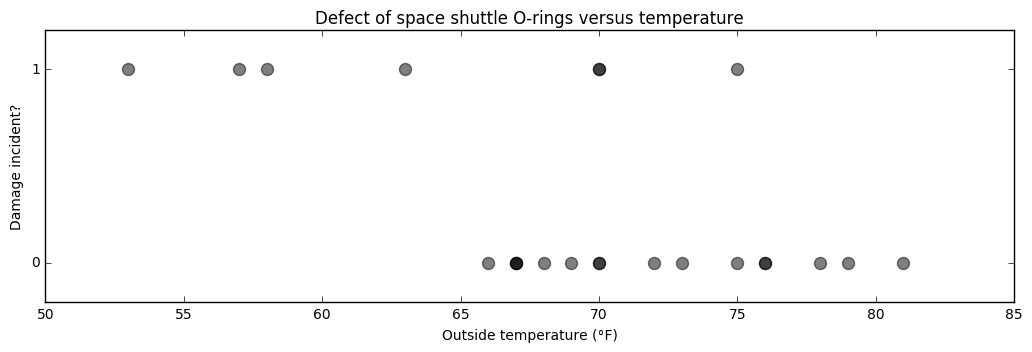

In [15]:
figsize(12.5, 3.5)
challenger_data = np.genfromtxt('data/challenger_data.csv', skip_header=1, usecols=[1, 2], missing_values='NA', delimiter=',')
# Drop NA values
challenger_data = challenger_data[~np.isnan(challenger_data[:, 1])]
plt.scatter(challenger_data[:, 0], challenger_data[:, 1], color='k', alpha=.5, s=75)
plt.yticks([0, 1])
plt.ylabel('Damage incident?')
plt.xlabel('Outside temperature (°F)')
_ = plt.title('Defect of space shuttle O-rings versus temperature')